In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [67]:

# Load the Breast Cancer dataset
df = pd.read_csv("./dataset/raw_dataset.data", header=None)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


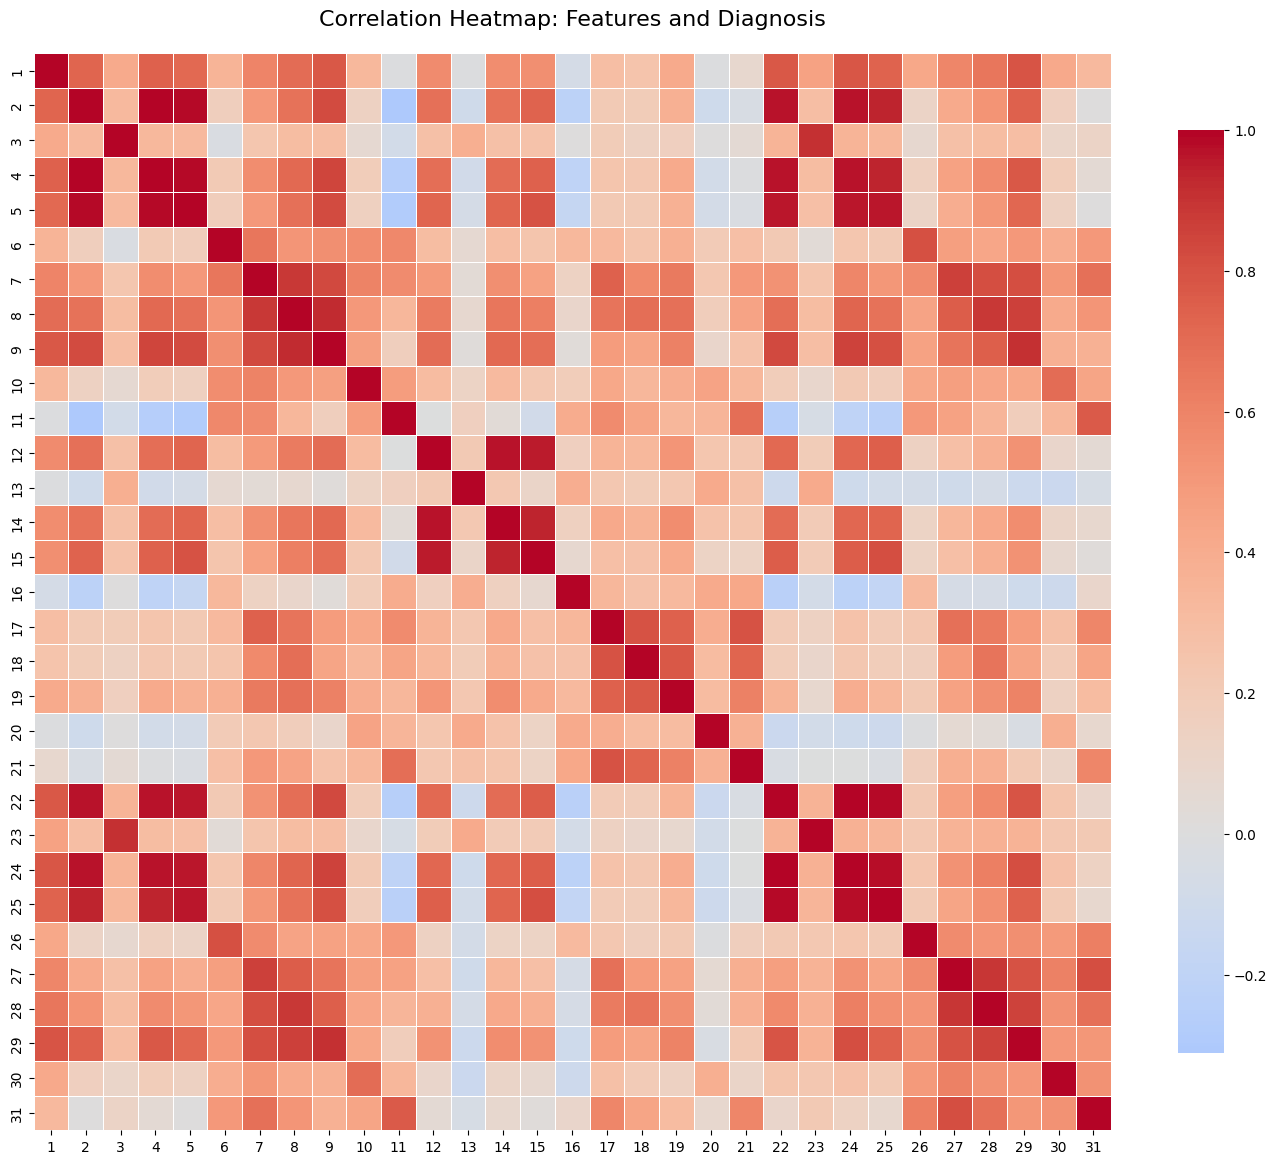

Top 10 features most correlated to diagnosis:
29    0.793566
24    0.782914
9     0.776614
22    0.776454
4     0.742636
25    0.733825
2     0.730029
5     0.708984
8     0.696360
28    0.659610
Name: 1, dtype: float64


In [68]:
# CORRELATION HEATMAP

# Copy data with dropped nga IDs
df_corr = df.drop(columns=[0]).copy()
df_corr[1] = (df_corr[1] == 'M').astype(int)  # Convert M/B to 1/0

# Heatmap Plot
plt.figure(figsize=(14, 12))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Features and Diagnosis', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Top 10 features most correlated to diagnosis:")
diagnosis_corr = df_corr.corr()[1].drop(1).sort_values(ascending=False)
print(diagnosis_corr.head(10))

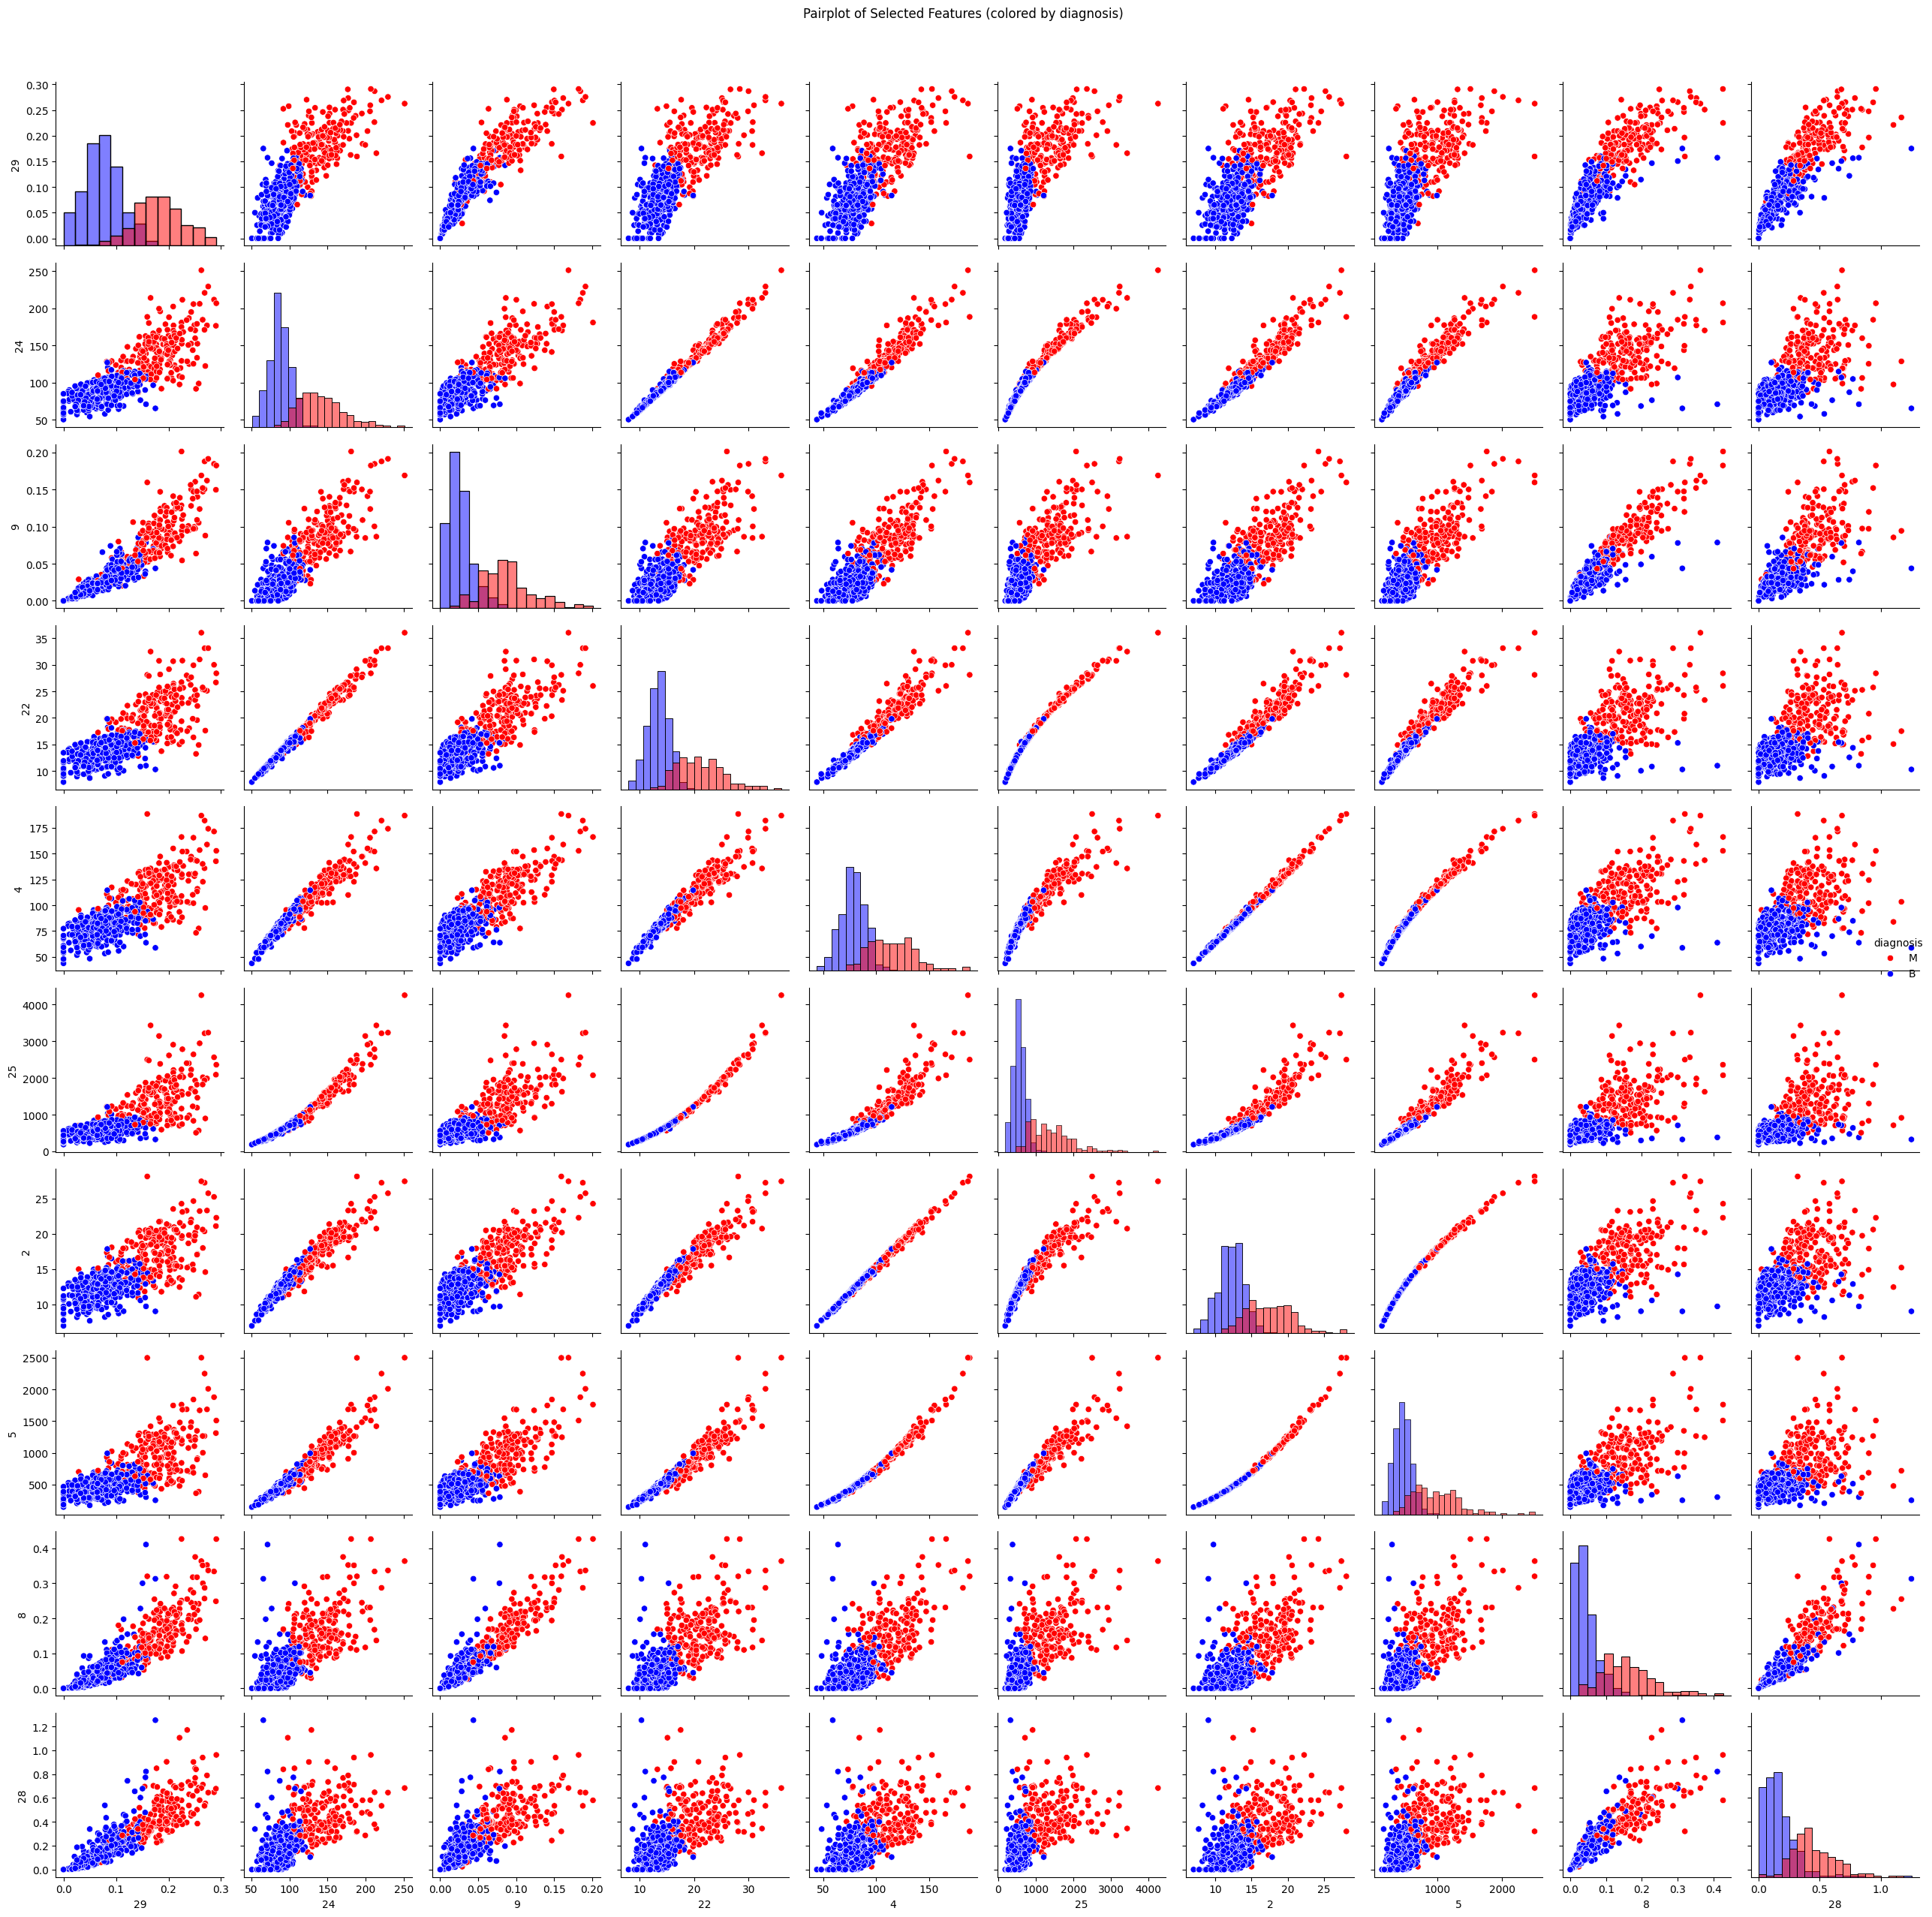

Pairplot complete!


In [69]:
# PAIRPLOT - Visualize relationships between selected features

# Columns selected (most correlated to diagnosis):
# 29, 24, 9, 22, 4, 25, 2, 5, 8, 28
selected_cols = [29, 24, 9, 22, 4, 25, 2, 5, 8, 28]
df_pair = df[[1] + selected_cols].copy()
df_pair = df_pair.rename(columns={1: 'diagnosis'})


# Create pairplot (Diagnosis Column is exempt)
pairplot_fig = sns.pairplot(df_pair, vars=[col for col in df_pair.columns if col != 'diagnosis'], 
                          hue='diagnosis', palette={'M': 'red', 'B': 'blue'}, diag_kind='hist', corner=False)
plt.suptitle('Pairplot of Selected Features (colored by diagnosis)', y=1.02)
plt.tight_layout()
plt.show()

print("Pairplot complete!")

In [70]:
# Since column 29 and column 24 ang pinaka correlated, use those

X_selected = df[[29, 24]].values  # Select columns 29 and 24
y = df[1].values
y = (y == 'M').astype(int).reshape(-1, 1)  # Convert M/B to 1/0

# Normalize the selected features
X_mean = X_selected.mean(axis=0)
X_std = X_selected.std(axis=0)
X_normalized = (X_selected - X_mean) / X_std

print(f"Selected features shape: {X_selected.shape}")
print(f"Target shape: {y.shape}")
print(f"Using features at columns 29 and 24")
print("Data normalized successfully")

Selected features shape: (569, 2)
Target shape: (569, 1)
Using features at columns 29 and 24
Data normalized successfully


In [71]:
# Split data into training and testing sets (80/20 split)
np.random.seed(42)

# Get indices and shuffle them
indices = np.arange(len(X_normalized))
np.random.shuffle(indices)

# Calculate split point (80% train, 20% test)
split_idx = int(0.8 * len(X_normalized))

# Split indices
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Split data
X_train = X_normalized[train_indices]
X_test = X_normalized[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training - Malignant: {y_train.sum()}, Benign: {len(y_train) - y_train.sum()}")
print(f"Testing - Malignant: {y_test.sum()}, Benign: {len(y_test) - y_test.sum()}")

Training set: 455 samples
Testing set: 114 samples
Training - Malignant: 165, Benign: 290
Testing - Malignant: 47, Benign: 67


In [72]:


# Neural Network Design:
# Input layer: 2 neurons (features 29 and 24)
# Hidden layer: 4 neurons (activation: sigmoid)
# Output layer: 1 neuron (binary output)

# Weights initialization (normalized random values)
weights_0 = np.random.randn(2, 4) * 0.8
weights_1 = np.random.randn(4, 1) * 0.8


# Biases (normalized random values)
b1 = np.random.randn(1, 4) * 0.8
b2 = np.random.randn(1, 1) * 0.8

print(weights_0)
print(weights_1)
print(b1)
print(b2)


[[ 0.31363351 -0.0996202  -0.16016392  1.6197768 ]
 [-0.68260795 -0.01142444  0.16152595 -0.64378935]]
[[-1.15252219]
 [ 0.21545412]
 [ 1.45093326]
 [ 0.32366632]]
[[ 0.07205807  0.06618435 -0.20673419  0.94678586]]
[[-0.40435382]]


In [73]:
# Training parameters
lr = 0.1  # learning rate
epochs = 2000

train_losses = []

for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X_train, weights_0) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights_1) + b2
    a2 = sigmoid(z2)

    # Compute error and output delta
    error = a2 - y_train
    d_a2 = error * sigmoid_derivative(a2)

    # Backpropagation
    error_hidden = np.dot(d_a2, weights_1.T)
    d_a1 = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases (gradient descent)
    weights_1 -= np.dot(a1.T, d_a2) * lr
    b2 -= np.sum(d_a2, axis=0, keepdims=True) * lr
    weights_0 -= np.dot(X_train.T, d_a1) * lr
    b1 -= np.sum(d_a1, axis=0, keepdims=True) * lr

    # Compute and record MSE loss
    loss = np.mean(error ** 2)
    train_losses.append(loss)

    # Print progress every 200 epochs
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss:.4f}")

print("\nTraining complete!")
print("weights_0:")
print(weights_0)
print("weights_1:")
print(weights_1)
print("b1 (hidden biases):")
print(b1)
print("b2 (output bias):")
print(b2)


Epoch 200/2000, Training Loss: 0.0356
Epoch 400/2000, Training Loss: 0.0355
Epoch 600/2000, Training Loss: 0.0351
Epoch 800/2000, Training Loss: 0.0336
Epoch 1000/2000, Training Loss: 0.0329
Epoch 1200/2000, Training Loss: 0.0328
Epoch 1400/2000, Training Loss: 0.0327
Epoch 1600/2000, Training Loss: 0.0326
Epoch 1800/2000, Training Loss: 0.0326
Epoch 2000/2000, Training Loss: 0.0325

Training complete!
weights_0:
[[-2.06515928 -0.36757121 -3.26168802  2.90409313]
 [-1.24173849 -0.31453294  5.21090833  1.97412832]]
weights_1:
[[-5.89855341]
 [-0.2691047 ]
 [ 5.78474162]
 [ 5.22276649]]
b1 (hidden biases):
[[ 0.37102748 -0.48850941 -2.10861023 -2.94266767]]
b2 (output bias):
[[0.67546164]]


In [74]:
# Evaluate model on training set
z1_train = np.dot(X_train, weights_0) + b1
a1_train = sigmoid(z1_train)
z2_train = np.dot(a1_train, weights_1) + b2
a2_train = sigmoid(z2_train)

predictions_train = (a2_train > 0.5).astype(int)
accuracy_train = np.mean(predictions_train == y_train)

print("TRAINING SET RESULTS")
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")
print(f"Correct predictions: {np.sum(predictions_train == y_train)}/{len(y_train)}")

# Evaluate model on testing set
z1_test = np.dot(X_test, weights_0) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, weights_1) + b2
a2_test = sigmoid(z2_test)

predictions_test = (a2_test > 0.5).astype(int)
accuracy_test = np.mean(predictions_test == y_test)

print("\nTESTING SET RESULTS")
print(f"Testing Accuracy: {accuracy_test * 100:.2f}%")
print(f"Correct predictions: {np.sum(predictions_test == y_test)}/{len(y_test)}")

print(f"\nFIRST 10 TEST PREDICTIONS")
for i in range(10):
    pred = "Malignant" if predictions_test[i] == 1 else "Benign"
    actual = "Malignant" if y_test[i] == 1 else "Benign"
    confidence = a2_test[i][0]
    print(f"  Sample {i+1}: Predicted={pred} ({confidence:.3f}), Actual={actual}")

TRAINING SET RESULTS
Training Accuracy: 94.95%
Correct predictions: 432/455

TESTING SET RESULTS
Testing Accuracy: 93.86%
Correct predictions: 107/114

FIRST 10 TEST PREDICTIONS
  Sample 1: Predicted=Malignant (1.000), Actual=Malignant
  Sample 2: Predicted=Malignant (0.999), Actual=Malignant
  Sample 3: Predicted=Benign (0.008), Actual=Benign
  Sample 4: Predicted=Malignant (0.997), Actual=Malignant
  Sample 5: Predicted=Malignant (1.000), Actual=Malignant
  Sample 6: Predicted=Benign (0.032), Actual=Benign
  Sample 7: Predicted=Benign (0.009), Actual=Benign
  Sample 8: Predicted=Benign (0.011), Actual=Benign
  Sample 9: Predicted=Malignant (1.000), Actual=Malignant
  Sample 10: Predicted=Benign (0.006), Actual=Benign


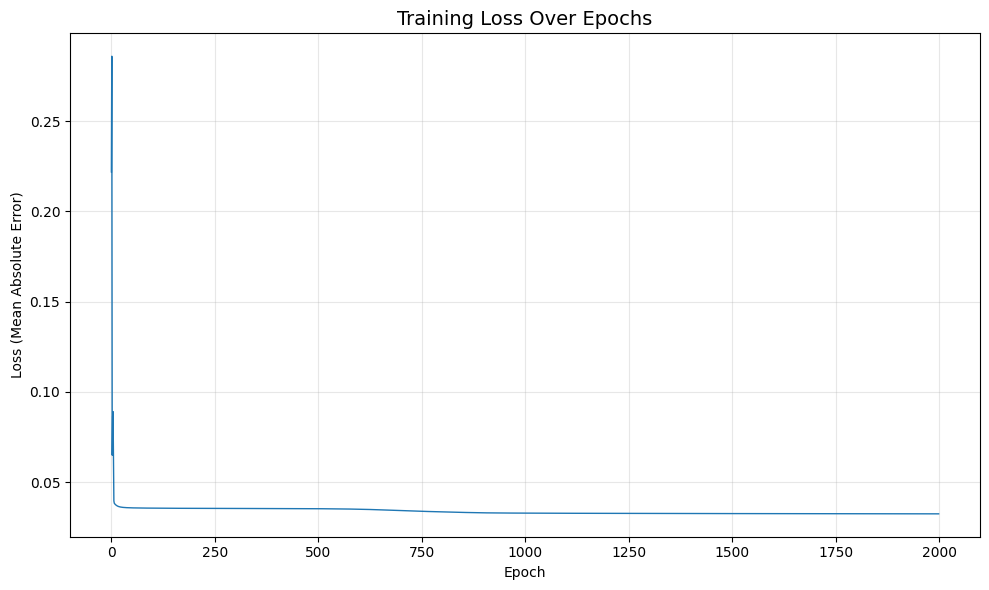

Final training loss: 0.0325


In [75]:
# Plot training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses, linewidth=1)
plt.title('Training Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Absolute Error)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {train_losses[-1]:.4f}")